# House price prediction model using machine learning in python

#### problem Statement:-
    we have experienced a time when we have to look up our new house to buy but then the journey begins with a lot of fraud negotiating dealing till researching the local area.
    So to deal with this kind of issue today we will be preparing machine learning based model trained on the house price prediction dataset.

#### Our data set consists of thirteen features:
    1->   Id                      -> To count the records.
    2- > MSSubClass       -> Identifies the type of dwelling involved in the sale.
    3->  MSZoning          -> Identifies the general zoning classification of the sale.
    4->  LotArea             -> Lot size in square feet.
    5->  LotConfig          -> Configuration of the lot
    6->  BldgType           -> Type of dwelling
    7->  OverallCond      -> Rates the overall condition of the house
    8->  YearBuilt           -> Original construction year
    9->  YearRemodAdd -> Remodel date (same as construction date if no remodeling or additions).
    10-> Exterior1st       -> Exterior covering on house
    11-> BsmtFinSF2       -> Type 2 finished square feet.
    12-> TotalBsmtSF      -> Total square feet of basement area
    13-> SalePrice            -> To be predicted

In [2]:
#                        IMPORTING ALL REQUIRE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#                        IMPORTING OUR DATASET

df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')

df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
print(df.shape)

print("Our model consist of 13 Parameters and and 2919 instances")

(2919, 13)
Our model consist of 13 Parameters and and 2919 instances


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
print('-'*70)
obj = (df.dtypes =="object")
obj_col = list(obj[obj].index)
print("Categorical Variables :- \nNo. of CV:-",len(obj_col))
print(obj_col)
print('-'*70)

inte = (df.dtypes == 'int64')
int_col = list(inte[inte].index)
print("Interger Variables :- \nNo. of CV:-",len(int_col))
print(int_col)
print('-'*70)

float_ = (df.dtypes == "float64")
float_col = list(float_[float_].index)
print("Float Variables :- \nNo. of CV:-",len(float_col))
print(float_col)
print('-'*70)

----------------------------------------------------------------------
Categorical Variables :- 
No. of CV:- 4
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
----------------------------------------------------------------------
Interger Variables :- 
No. of CV:- 6
['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
----------------------------------------------------------------------
Float Variables :- 
No. of CV:- 3
['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
----------------------------------------------------------------------


In [7]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [8]:
print("Shape:- ",df.shape)
df.isnull().sum()

Shape:-  (2919, 13)


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

### Dealing with null values In saleprice parameter:-

     From this observation we get to know that out of 2919 data instances we have 1459 as null value 
     so it is a big number as compared comparative to the original data set so we cannot put mean value in place of null value 
     because if we place mean value in place of null value then it can affect our training model.
     
     So what we will do we will just train our model without using this 1459 instance in as we train our model properly after that we will predict the value of this 1459 instance and put this value in our original data set and after that we will retrain our model and try to predict the whole dataSet

In [9]:
# here we are Create a new data set which have sales price as
df_null = df[df['SalePrice'].isnull()]

In [10]:
# Now we are removing all the instances which have sale price as null
df = df[df['SalePrice'].notnull()]

In [11]:
df.shape

(1460, 13)

In [12]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [13]:
#                        Exploratory data analysis

# Categorical Variables :- 
# No. of CV:- 4
# ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [14]:
#                    ANALYSING MSZONING
print("No. of unique Values in MSZoning :- ",df['MSZoning'].nunique())
print(df['MSZoning'].unique())

No. of unique Values in MSZoning :-  5
['RL' 'RM' 'C (all)' 'FV' 'RH']


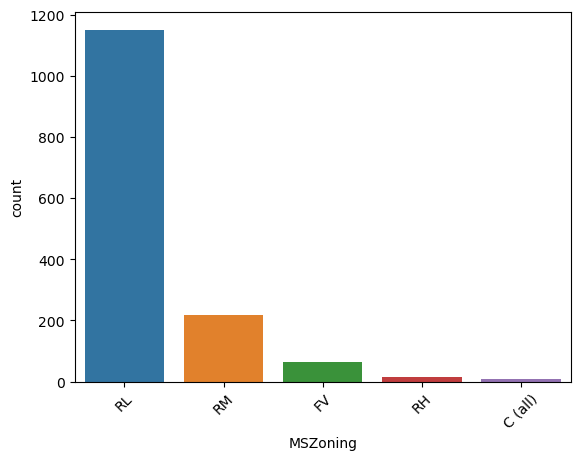

In [15]:
sns.countplot(data = df, x = 'MSZoning',order=df['MSZoning'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [16]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [17]:
#                    ANALYSING LotConfig
#  LotConfig  -> Configuration of the lot

print("No. of unique Values in LotConfig :- ",df['LotConfig'].nunique())
print(df['LotConfig'].unique())

No. of unique Values in LotConfig :-  5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


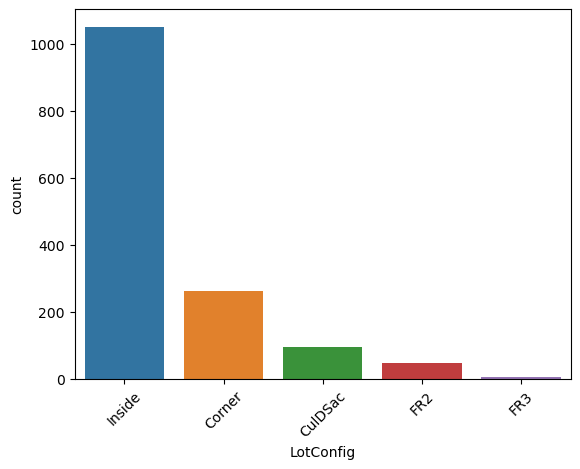

In [18]:
sns.countplot(data=df, x = 'LotConfig',order=df['LotConfig'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [19]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [20]:
#                    ANALYSING BldgType
# BldgType  -> Type of dwelling
print("No. of unique Values in BldgType :- ",df['BldgType'].nunique())
print(df['BldgType'].unique())

No. of unique Values in BldgType :-  5
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


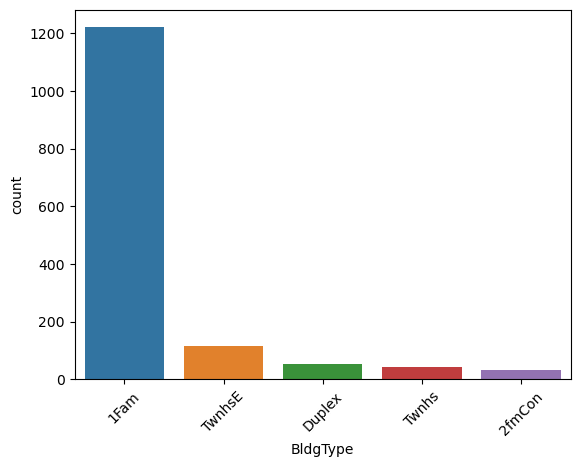

In [21]:
sns.countplot(data = df, x = 'BldgType', order=df['BldgType'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [22]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [23]:
#                    ANALYSING Exterior1st
# BldgType  -> Type of dwelling
print("No. of unique Values in Exterior1st :- ",df['Exterior1st'].nunique())
print(df['Exterior1st'].unique())

No. of unique Values in Exterior1st :-  15
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


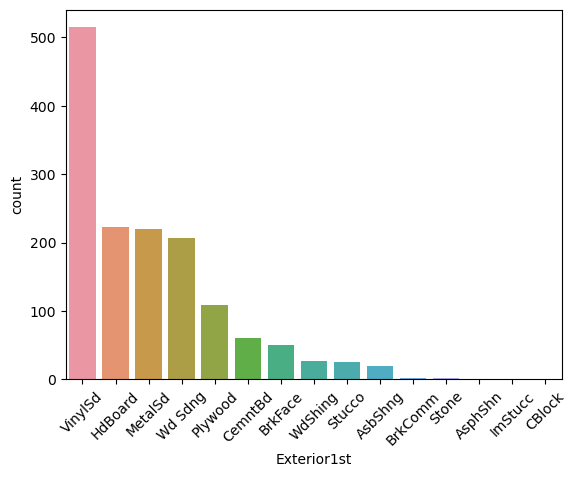

In [24]:
sns.countplot(data=df,x='Exterior1st',order=df['Exterior1st'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_21244\1832066279.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


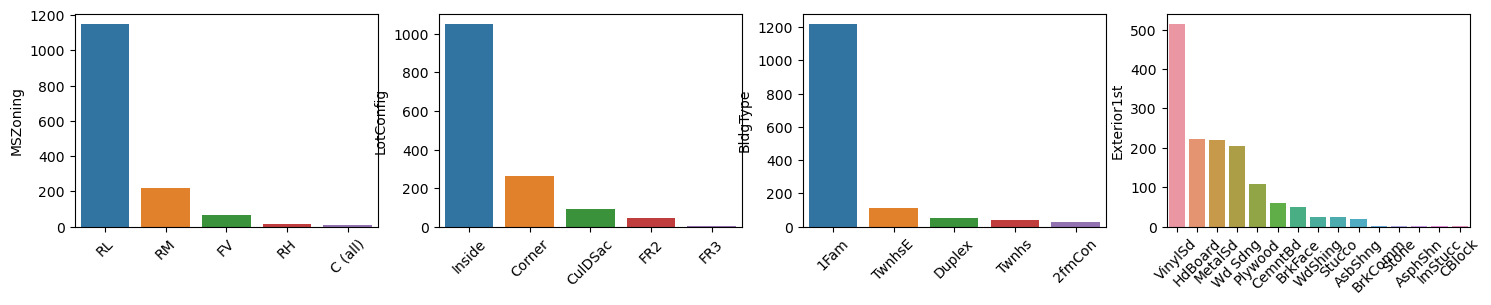

In [25]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=45)
index = 1

for col in obj_col:
	y = df[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=45)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [26]:
#                        ANALYSING NUMERICAL PARAMETER
# Interger Variables :- 
# No. of CV:- 6
# ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

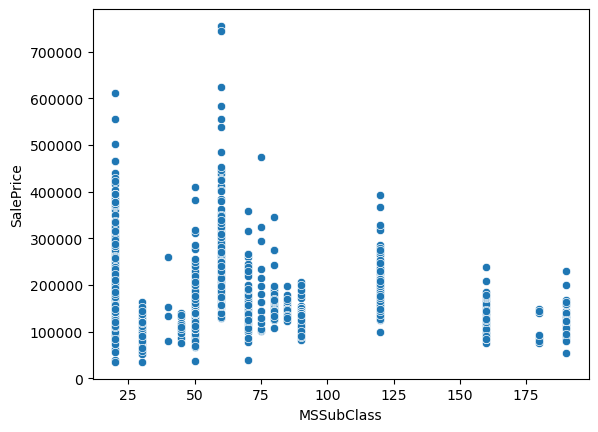

In [27]:
sns.scatterplot(data=df,x = 'MSSubClass',y ='SalePrice' )

C:\Users\shrey\AppData\Local\Temp\ipykernel_21244\1996137789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

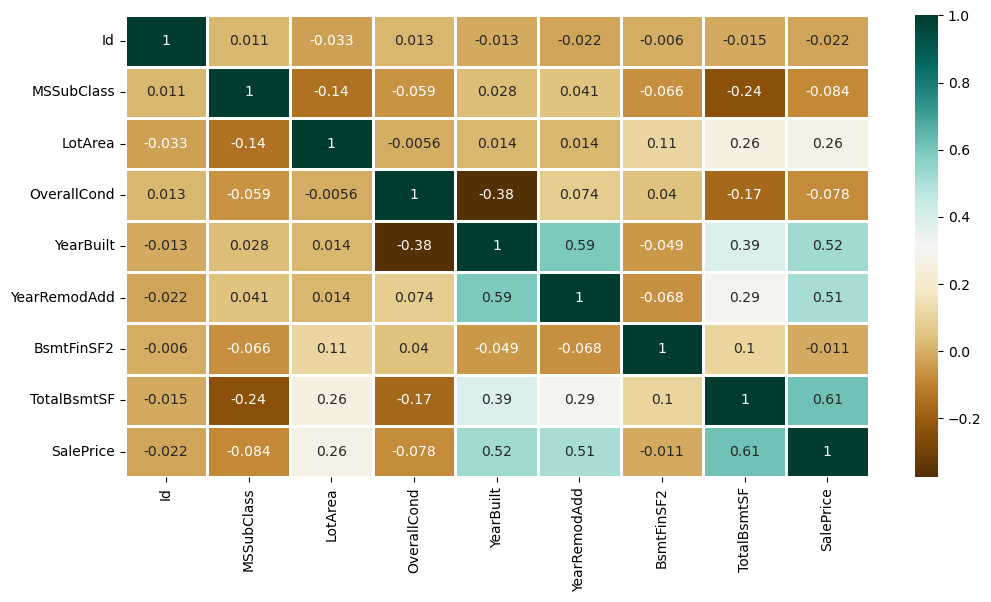

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            linewidths = 2,
            annot = True)


In [29]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [30]:

# Assuming object_cols contains the names of categorical columns
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

# Set the index of OH_cols to match df
OH_cols.index = df.index

# Get the column names for the one-hot encoded features
feature_names = OH_encoder.get_feature_names_out(input_features=object_cols)

# Assign the column names to OH_cols
OH_cols.columns = feature_names

# Drop the categorical columns from df
df_final = df.drop(object_cols, axis=1)

# Concatenate df_final with OH_cols
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
df_final

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#                        SPITING THE DATA INTO TRAIN AND TEST 

from sklearn.model_selection import train_test_split

output = 'SalePrice'

X = df_final.drop('SalePrice',axis = 1)

Y = df['SalePrice']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [34]:
print("X_Train Shape :- ",x_train.shape)
print("X_Test Shape :- ",x_test.shape)
print("Y_Train Shape :- ",y_train.shape)
print("Y_Test Shape :- ",y_test.shape)

X_Train Shape :-  (1168, 38)
X_Test Shape :-  (292, 38)
Y_Train Shape :-  (1168,)
Y_Test Shape :-  (292,)


#### STANDARD SCALAR 

    But before training our model using SPN we will standardise our parameters so that it can give better result while we are using  svm algorithm 

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
scaler.fit(x_train)

StandardScaler()

In [37]:
x_Train_standardized = scaler.transform(x_train)
x_test_standardized = scaler.transform(x_test)

In [38]:
print("No. of columns in standardized x_train:- ",len(x_Train_standardized[0]))
print("No. of instances in standardized x_train:- ",len(x_Train_standardized))
print("No. of columns in standardized x_test:- ",len(x_test_standardized[0]))
print("No. of instances in standardized x_test:- ",len(x_test_standardized))

No. of columns in standardized x_train:-  38
No. of instances in standardized x_train:-  1168
No. of columns in standardized x_test:-  38
No. of instances in standardized x_test:-  292


In [39]:

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_Train_standardized,y_train)

SVR()

In [40]:
##          SUPPORT VECTOR REGRESSION

predict = regressor.predict(x_test_standardized)

In [41]:
predict

array([165003.8704095 , 165031.58533457, 164965.55850576, 164971.06698165,
       165094.09924994, 164975.16850389, 165007.30279184, 164983.8337096 ,
       164971.05317065, 164967.61561749, 164957.62091911, 164994.92223472,
       164975.68862454, 165091.3286384 , 165076.9244835 , 164999.66547693,
       165075.76166194, 165000.28796278, 164964.23986691, 165083.7755621 ,
       164994.65138499, 165039.99472637, 165023.17112241, 164989.31282055,
       165081.9355895 , 165009.19850265, 165089.71328213, 165007.9069179 ,
       165060.91983883, 165007.14032527, 164971.65841958, 165084.3566883 ,
       164998.27818822, 165008.02562887, 165075.92993886, 164997.4269693 ,
       165034.57449636, 165078.17383165, 165011.07623179, 164964.90246805,
       164938.90240771, 165075.27269959, 165000.77364874, 165095.65066838,
       164984.80676774, 164938.38004801, 164980.79217322, 164988.59137993,
       165029.5059483 , 164978.37741583, 164960.57574645, 165025.19640619,
       164974.62998158, 1

In [42]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_test,predict))

0.35958112562704925
